# New York Foodies 

In [1]:
# Import Dependencies 
import os 
import csv 
import pandas as pd 
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import random
import json
import requests

In [2]:
# Read CSV File 
food_data_df = pd.read_csv('food_order.csv')
food_data_df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [ ]:
# Set the variables 

# # Add variables 
# order_id = food_data_df['order_id']
# customer_df = food_data_df['customer_id']
# food_type = food_data_df['cuisine_type']
# restaurant_df = food_data_df['restaurant_name']
# cost_df = food_data_df['cost_of_the_order']
# day_of_week = food_data_df['day_of_the_week']
# ratings = food_data_df['rating']
# prep_time = food_data_df['food_preparation_time']
# deliv_time = food_data_df['delivery_time']


In [3]:
# Count values to determine if there are inconsistencies on the numbers to verify what needs to be cleaned
food_data_df.count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

In [4]:
#Drop COlumns
columns = ['order_id', 'customer_id']
food_data_df.drop(columns=columns,inplace=True)

In [5]:
food_data_df


,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...
1893,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,The Smile,American,12.18,Weekend,5,31,19
1895,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [23]:
# Describe the Data Set 
food_data_df.describe()

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_data=food_data_df.loc[food_data_df['rating']!='Not given']
Clean_data['rating'] = Clean_data['rating'].astype("int")
Clean_data.head()

C:\Users\wedmo\AppData\Local\Temp\ipykernel_4852\2379658140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['rating'] = Clean_data['rating'].astype("int")


,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,Barbounia,Mediterranean,5.97,Weekday,3,33,30


In [17]:
Clean_data.count()

restaurant_name          1162
cuisine_type             1162
cost_of_the_order        1162
day_of_the_week          1162
rating                   1162
food_preparation_time    1162
delivery_time            1162
dtype: int64

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the food prep time for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each cuisine type: 
# mean, median, variance, standard deviation, and SEM of the food prep time. 
# Assemble the resulting series into a single summary DataFrame.
meanfoodprep = Clean_data.groupby(['cuisine_type'])['food_preparation_time'].mean()
medianfoodprep = Clean_data.groupby(['cuisine_type'])['food_preparation_time'].median()
variancefoodprep = Clean_data.groupby(['cuisine_type'])['food_preparation_time'].var()
standard_deviation_foodprep = Clean_data.groupby(['cuisine_type'])['food_preparation_time'].std()
mean_error_foodprep = Clean_data.groupby(['cuisine_type'])['food_preparation_time'].sem()
summary_stats = pd.DataFrame(
    {
        "Mean Food Prep Time": meanfoodprep,
        "Median Food Prep Time": medianfoodprep,
        " Food Prep Time Variance": variancefoodprep,
        " Food Prep Time Std. Dev.": standard_deviation_foodprep,
        " Food Prep Time Std. Err.": mean_error_foodprep
    }
)
summary_stats

,Mean Food Prep Time,Median Food Prep Time,Food Prep Time Variance,Food Prep Time Std. Dev.,Food Prep Time Std. Err.
cuisine_type,,,,,
American,27.388587,27.0,21.622431,4.649993,0.242398
Chinese,27.977444,28.0,22.613124,4.755326,0.412339
French,26.600000,25.5,20.488889,4.526465,1.431394
Indian,26.280000,26.0,19.593469,4.426451,0.625995
Italian,27.627907,28.0,22.024480,4.693025,0.357840
Japanese,27.652015,28.0,21.963020,4.686472,0.283638
Korean,25.333333,25.0,15.750000,3.968627,1.322876
Mediterranean,27.875000,29.0,23.467742,4.844352,0.856368
Mexican,25.854167,24.0,20.893174,4.570905,0.659753


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the food prep time for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each cuisine type: 
# mean, median, variance, standard deviation, and SEM of the food prep time. 
# Assemble the resulting series into a single summary DataFrame.
meandeliverytime = Clean_data.groupby(['cuisine_type'])['delivery_time'].mean()
mediandeliverytime = Clean_data.groupby(['cuisine_type'])['delivery_time'].median()
variancedeliverytime = Clean_data.groupby(['cuisine_type'])['delivery_time'].var()
standard_deviation_deliverytime = Clean_data.groupby(['cuisine_type'])['delivery_time'].std()
mean_error_deliverytime = Clean_data.groupby(['cuisine_type'])['delivery_time'].sem()
summary_stats2 = pd.DataFrame(
    {
        "Mean delivery Time": meandeliverytime,
        "Median delivery Time": mediandeliverytime,
        " delivery Time Variance": variancedeliverytime,
        " delivery Time Std. Dev.": standard_deviation_deliverytime,
        " delivery Time Std. Err.": mean_error_deliverytime
    }
)
summary_stats2

,Mean delivery Time,Median delivery Time,delivery Time Variance,delivery Time Std. Dev.,delivery Time Std. Err.
cuisine_type,,,,,
American,24.396739,25.0,22.065602,4.697404,0.244869
Chinese,23.496241,24.0,25.615516,5.061177,0.438860
French,25.100000,25.5,14.766667,3.842742,1.215182
Indian,23.300000,24.0,24.540816,4.953869,0.700583
Italian,25.209302,26.0,24.049504,4.904029,0.373929
Japanese,23.743590,24.0,25.338424,5.033729,0.304655
Korean,21.111111,21.0,23.861111,4.884784,1.628261
Mediterranean,23.187500,23.5,27.641129,5.257483,0.929400
Mexican,24.770833,25.0,20.903812,4.572069,0.659921


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the delivery time 
#for each rating

# Use groupby and summary statistical methods to calculate the following properties of each rating: 
# mean, median, variance, standard deviation, and SEM of the delivery time . 
# Assemble the resulting series into a single summary DataFrame.
meandeliverytime = Clean_data.groupby(['rating'])['delivery_time'].mean()
mediandeliverytime = Clean_data.groupby(['rating'])['delivery_time'].median()
variancedeliverytime = Clean_data.groupby(['rating'])['delivery_time'].var()
standard_deviation_deliverytime = Clean_data.groupby(['rating'])['delivery_time'].std()
mean_error_deliverytime = Clean_data.groupby(['rating'])['delivery_time'].sem()
summary_stats3 = pd.DataFrame(
    {
        "Mean delivery Time": meandeliverytime,
        "Median delivery Time": mediandeliverytime,
        " delivery Time Variance": variancedeliverytime,
        " delivery Time Std. Dev.": standard_deviation_deliverytime,
        " delivery Time Std. Err.": mean_error_deliverytime
    }
)
summary_stats3

,Mean delivery Time,Median delivery Time,delivery Time Variance,delivery Time Std. Dev.,delivery Time Std. Err.
rating,,,,,
3,24.558511,25.0,21.648965,4.652845,0.339344
4,23.867876,24.0,24.239641,4.923377,0.250593
5,24.212585,25.0,25.186417,5.018607,0.206964


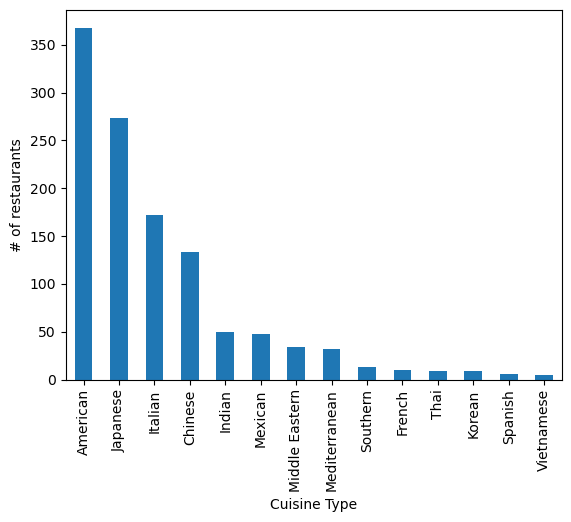

In [24]:
# Generate a bar plot showing the total number of restaurants for each cuisine type using Pandas.
restaurantcounts=Clean_data['cuisine_type'].value_counts()
restaurantcounts.plot(kind='bar')
plt.ylabel('# of restaurants')
plt.xlabel('Cuisine Type')
plt.show()

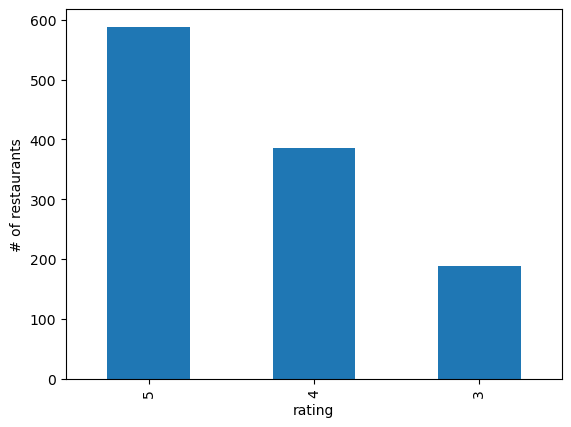

In [25]:
# Generate a bar plot showing the total number of restaurants for each rating type using Pandas.
restaurantcounts=Clean_data['rating'].value_counts()
restaurantcounts.plot(kind='bar')
plt.ylabel('# of restaurants')
plt.xlabel('rating')
plt.show()